## Лабораторная работа 3.

## Группа: РИМ-111060

## Подгруппа задания (вариант): 3

### ФИО студентов:
#### Лисовский Кирилл Алексеевич
#### Никитенко Андрей Михайлович
#### Уксусников Николай Алексеевич
#### Савин Михаил Валерьевич
#### Степаненко Дмитрий Владимирович

## 1. Сначала импортируйте в свой код нужные библиотеки, функции и т.д.


In [127]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
%matplotlib inline
from scipy.optimize import curve_fit

## 2-3. Создать временной ряд из столбца (всего 24 точки). ВР определен на временном интервале от 0 до 1 (далее переменная t). Построить график заданного ряда. Для загрузки варианта № 3 из таблицы-файла используем:

In [128]:
import pandas as pd
table = pd.read_excel('for_lab3.xlsx')
variant = 3 # номер варианта 3 
Y = np.array(table.values[variant-1][1:])
print(Y)

[ 0.54  2.16  5.39  3.48  4.54  7.99  7.95  7.01  9.89 12.35 12.91 14.42
 14.13 18.67 16.95 15.84 19.23 22.05 22.59 21.15 23.98 26.45 29.8  27.41]


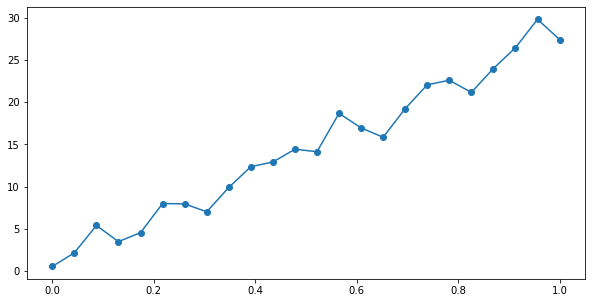

In [129]:
t = np.linspace(0, 1, 24) # создаем временной ряд

plt.figure(figsize=(10,5))
plt.plot(t, Y, 'o-', label = 'Исходный ВР')
X = np.vstack([np.ones(len(t)),t]).T # добавляем столбец единиц в массив времени

## 4-5-6-7-8. Рассчитать регрессионную модель тренда первого порядка, построим получившийся тренд:

#### Расcчитываем регрессионную модель тренда первого порядка:

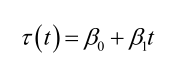

#### Сначала произвести оценку регрессионной модели. Для этого потребуется в матричном виде решить эту систему линейных уравнений:

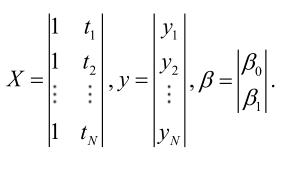

B0:  0.7895333333333328       B1:  27.327600000000007


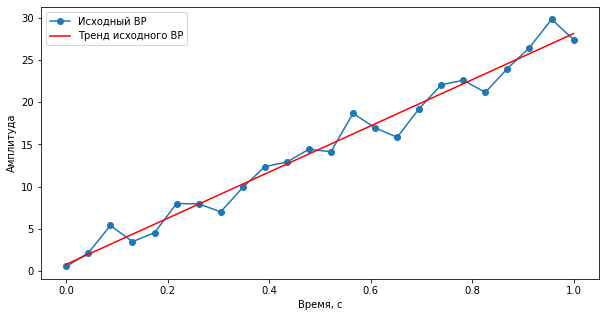

In [130]:
plt.figure(figsize=(10,5))
plt.plot(t, Y, 'o-', label = 'Исходный ВР')
X = np.vstack([np.ones(len(t)),t]).T # добавляем столбец единиц в массив времени

B = np.linalg.lstsq(X,Y,rcond=-1) #  решение системы уравнений

print('B0: ',B[0][0],'     ','B1: ', B[0][1])
plt.plot(t, B[0][0] + B[0][1]*t, 'r' , label = 'Тренд исходного ВР')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.legend()
plt.show()

## 9. Кроме матричных расчетов в Python, несомненно, существуют и готовые функции построения регрессионных кривых. Воспользуемся ими из нескольких библиотек:

### 10. На основе построения полиномиальных кривых из numpy:

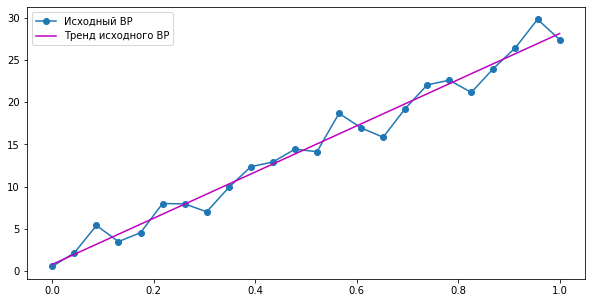

In [131]:
bb = np.polyfit(t,Y,1) # полиномиальная кривая первого порядка
plt.figure(figsize=(10,5))
plt.plot(t, Y, 'o-', label= 'Исходный ВР')
plt.plot(t, bb[1] + bb[0]*t, 'm', label = 'Тренд исходного ВР')
plt.legend()
plt.show()

#### Через функцию poly1d:

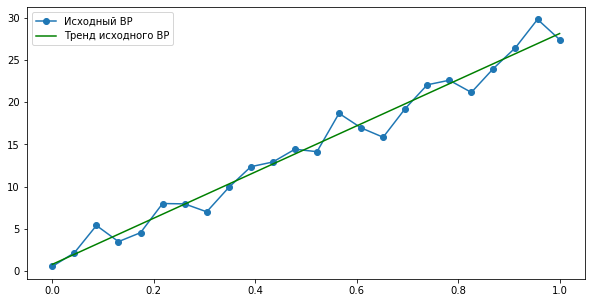

In [132]:
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize=(10, 5))
plt.plot(t, Y,'o-',label = 'Исходный ВР') # значения полинома на заданной временной сетке
plt.plot(t, p(t), 'g',label = 'Тренд исходного ВР')
plt.legend()
plt.show()

### 11. На основе линейной регрессии из scipy.stats:

Все коэффициенты и статистика регрессии:
LinregressResult(slope=27.327600000000007, intercept=0.7895333333333294, rvalue=0.9864642960008226, pvalue=9.044673886686205e-19, stderr=0.9684776144532011, intercept_stderr=0.56519586072772)


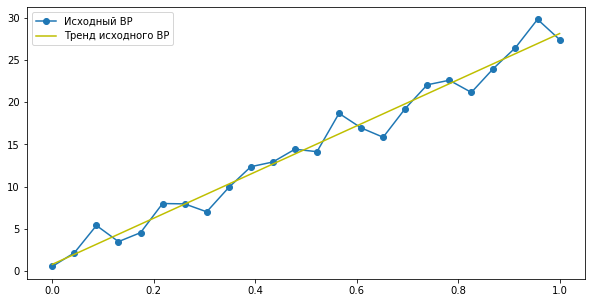

In [133]:
out = stats.linregress(t, Y)
print('Все коэффициенты и статистика регрессии:')
print(out) # выведем все коэффициенты и статистику регрессии
plt.figure(figsize = (10, 5))
plt.plot(t, Y, 'o-', label = 'Исходный ВР') # строим график кривой вместе с трендом
plt.plot(t, out.intercept + out.slope*t, 'y', label = 'Тренд исходного ВР')
plt.legend()
plt.show()

### 12. На основе подгонки кривых curve_fit из scipy.optimize:

In [134]:
def func(t, b0, b1): # описываем функцию тренда
    return b0 + b1 * t # линейный тренд с 2 параметрами

popt, pcov = curve_fit(func, t, Y) # проводим подгонку МНК

print('Коэффициенты B0 и B1: ', popt) # получаем коэффициенты b0 & b1
print('Ковариационная матрица ошибок подгонки: ', pcov) # ковариационная матрица ошибок подгонки

Коэффициенты B0 и B1:  [ 0.78953337 27.32759994]
Ковариационная матрица ошибок подгонки:  [[ 0.31944639 -0.46897449]
 [-0.46897449  0.93794894]]


### 13. На основе библиотеки sklearn:

In [135]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(t.reshape(-1,1), Y)

print('Линейный коэффициент B1: ', reg.coef_) # здесь выведется линейный коэффициент b1
print('Коэффициент B0 (смещение): ', reg.intercept_) # здесь выведется коэффициент b0 (смещение)
print('«Оценка» полученной регрессии: ', reg.score(t.reshape(-1,1), Y),'(чем ближе она к 1.0, тем лучше тренд)')
# здесь будет выведена «оценка» (равная R^2) полученной регрессии,чем ближе она к 1.0, тем лучше тренд

Линейный коэффициент B1:  [27.3276]
Коэффициент B0 (смещение):  0.7895333333333312
«Оценка» полученной регрессии:  0.9731118072843984 (чем ближе она к 1.0, тем лучше тренд)


### 14. На основе statsmodel:

In [136]:
import statsmodels.api as sm

x_ = sm.add_constant(t.reshape(-1,1)) # создаем простую модель
smm = sm.OLS(Y, x_) # используем Метод Наименьших Квадратов
# (МНК) (Ordinary Least Squares = OLS)

res = smm.fit() # подгоняем параметры модели по МНК
print('Результирующие коэффициенты B0 и B1: ',res.params) # получаем результирующие коэффициенты

Результирующие коэффициенты B0 и B1:  [ 0.78953333 27.3276    ]


### 15-16. Таким образом, во всех реализациях получились одинаковые коэффициенты линейного тренда.

## 17. Аналогичным образом постройте модель тренда второй и третьей степени. Также постройте модель экспоненциального тренда:

### Модель тренда второй степени:

Коэффициенты B0, B1, B2:  [ 1.19073867 24.81094832  2.51665168]
Ковариационная матрица ошибок подгонки:  [[  0.66602272  -2.60544243   2.12500623]
 [ -2.60544243  14.29045733 -13.32958499]
 [  2.12500623 -13.32958499  13.32958511]]


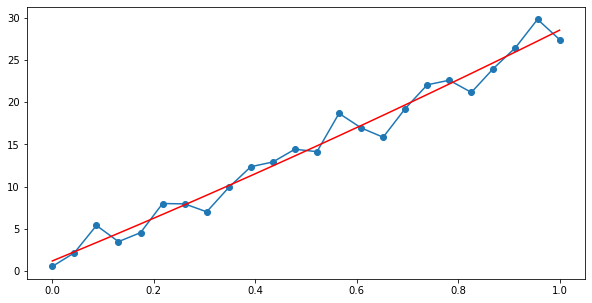

In [137]:
plt.figure(figsize=(10,5))
plt.plot(t, Y, 'o-', label = 'Исходный ВР')

def func(t, b0, b1,b2): # описываем функцию тренда
    return b0 + b1*t + b2*t*t

popt2, pcov2 = curve_fit(func, t, Y) # проводим подгонку МНК
print('Коэффициенты B0, B1, B2: ', popt2) # получаем коэффициенты
print('Ковариационная матрица ошибок подгонки: ',pcov2) # ковариационная матрица ошибок подгонки
plt.plot(t, popt2[0] + popt2[1]*t + popt2[2]*t*t, 'r', label = 'Тренд исходного ВР')
plt.show()

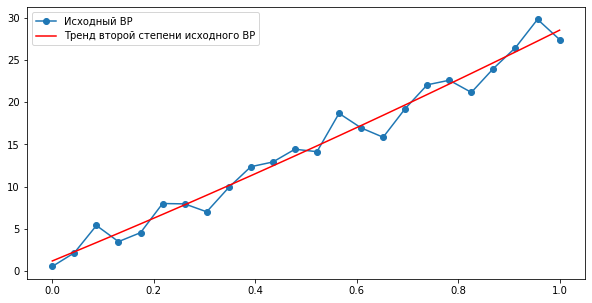

1.1907384615384664
24.810949650349635
2.516650349650373


In [138]:
bb = np.polyfit(t,Y,2) # полиномиальная кривая второго порядка
plt.figure(figsize=(10,5))
plt.plot(t, Y, 'o-', label = 'Исходный ВР')
plt.plot(t,bb[2] + bb[1]*t + bb[0]*t*t, 'r', label = 'Тренд второй степени исходного ВР')
plt.legend()
plt.show()
print(bb[2])
print(bb[1])
print(bb[0])

### Модель тренда третьей степени:

Коэффициенты B0, B1, B2:  [ 0.94004364 28.18285194 -6.09488859  5.74102672]
Ковариационная матрица ошибок подгонки:  [[   1.07783375   -7.88087165   15.41010996   -8.79797035]
 [  -7.88087165   84.38524912 -191.38442367  118.334605  ]
 [  15.41010996 -191.38442367  467.20652572 -302.21600215]
 [  -8.79797035  118.334605   -302.21600215  201.47733033]]


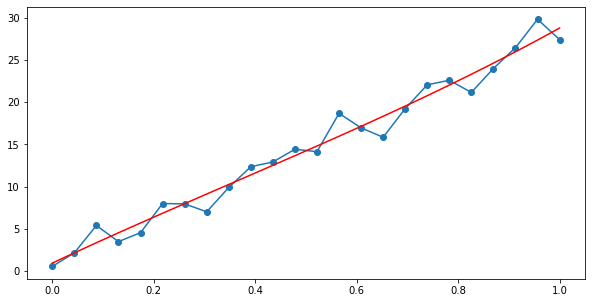

In [139]:
plt.figure(figsize=(10,5))
plt.plot(t, Y, 'o-' , label = 'Исходный ВР')

def func(t, b0, b1,b2,b3): # описываем функцию тренда
    return b0 + b1*t + b2*t*t + b3*t*t*t

popt3, pcov3 = curve_fit(func, t, Y) # проводим подгонку МНК
print('Коэффициенты B0, B1, B2: ', popt3) # получаем коэффициенты
print('Ковариационная матрица ошибок подгонки: ', pcov3) # ковариационная матрица ошибок подгонки
plt.plot(t, popt3[0] + popt3[1]*t + popt3[2]*t*t + popt3[3]*t*t*t, 'r', label = 'Тренд исходного ВР')
plt.show()

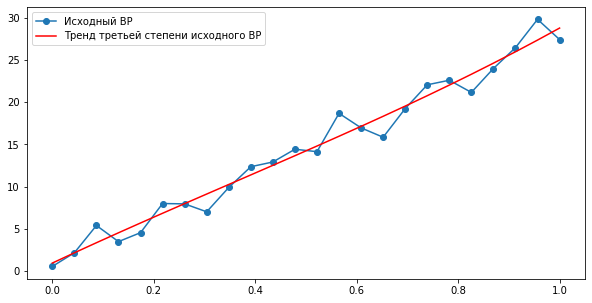

0.9400427350427415
28.182861434861426
-6.0949106449106125
5.741040663040653


In [140]:
bb = np.polyfit(t,Y,3) # полиномиальная кривая третьего порядка
plt.figure(figsize=(10,5))
plt.plot(t, Y, 'o-', label = 'Исходный ВР')
plt.plot(t, bb[3] + bb[2]*t + bb[1]*t*t + bb[0]*t*t*t, 'r', label = 'Тренд третьей степени исходного ВР')
plt.legend()
plt.show()
print(bb[3])
print(bb[2])
print(bb[1])
print(bb[0])

#### Таким образом,  во всех реализациях получились одинаковые коэффициенты тренда.

### Модель экспоненциального тренда:

Коэффициенты B0 и B1:  [5.20747011 1.78780969]
Ковариационная матрица ошибок подгонки:  [[ 0.27498588 -0.06337867]
 [-0.06337867  0.01586515]]


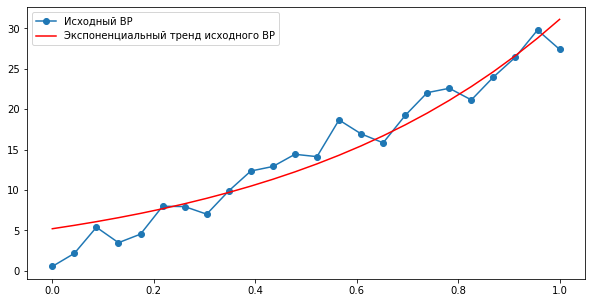

In [141]:
plt.figure(figsize=(10,5))
plt.plot(t, Y, 'o-', label = 'Исходный ВР')

def func(t, b0, b1): # описываем функцию тренда
    return b0*np.exp(b1*t) 

popt_exp, pcov_exp = curve_fit(func, t, Y) # проводим подгонку МНК

print('Коэффициенты B0 и B1: ', popt_exp) # получаем коэффициенты b0 & b1
print('Ковариационная матрица ошибок подгонки: ', pcov_exp) # ковариационная матрица ошибок подгонки

Z = np.zeros(len(t))
for i in range(len(t)):
    Z[i] = popt_exp[0]*np.exp(popt_exp[1]*t[i])

plt.plot(t, Z,'r',label='Экспоненциальный тренд исходного ВР')
plt.legend()
plt.show()

## 18. Все найденные тренды разной степени и модели нанесите на один график:

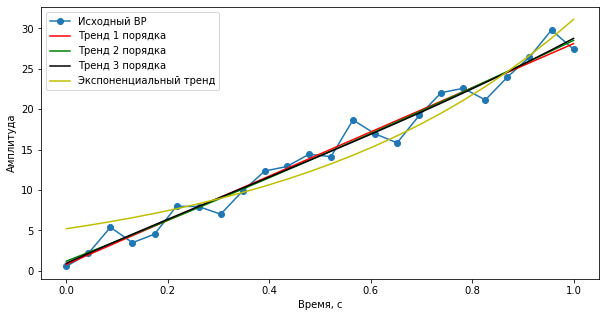

In [142]:
plt.figure(figsize=(10,5))
plt.plot(t, Y, 'o-', label = 'Исходный ВР')
plt.plot(t, popt[0] + popt[1]*t, 'r', label = 'Тренд 1 порядка')
plt.plot(t, popt2[0] + popt2[1]*t + popt2[2]*t*t,'g', label = 'Тренд 2 порядка')
plt.plot(t, popt3[0] + popt3[1]*t + popt3[2]*t*t + popt3[3]*t*t*t, 'k', label = 'Тренд 3 порядка')
plt.plot(t, Z, 'y', label = 'Экспоненциальный тренд')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.legend()
plt.show()

#### Таким образом,  мы убедились, что получились соответствующие правильные результаты.

## 19-20. Теперь построим тренд методом сглаживания:

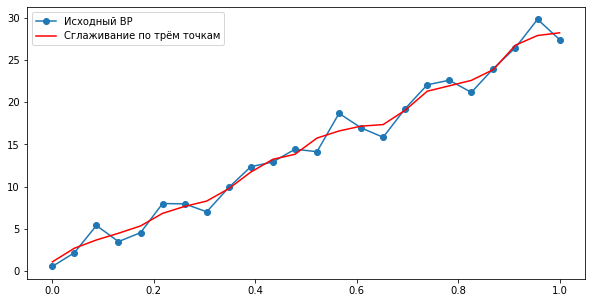

In [143]:
def smooth(x, window_len):
    if window_len<3:
        return x
    s=np.r_[2*x[0] - x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]
    w=np.ones(window_len, 'd')
    y=np.convolve(w/w.sum(), s, mode='same')
    return y[window_len:-window_len+1]

Smoothed_data = smooth(Y, 3) # сглаживание по 3 точкам
plt.figure(figsize=(10,5))
plt.plot(t, Y, 'o-', label = 'Исходный ВР')
plt.plot(t, Smoothed_data, 'r', label = 'Сглаживание по трём точкам')
plt.legend()
plt.show()

## 21. Постройте тренды, полученные методом скользящего сглаживания по трем, семи и одиннадцати точкам. Постройте каждый из них отдельно, но вместе с исходным ВР:

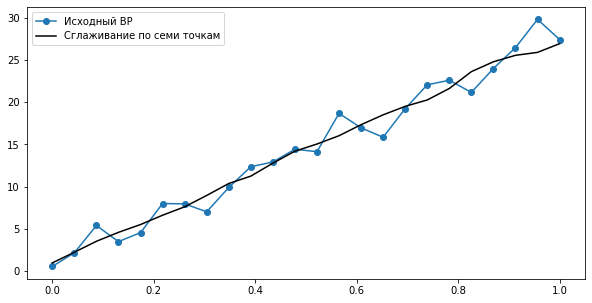

In [144]:
def smooth(x, window_len):
    if window_len<7:
        return x
    s=np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]
    w=np.ones(window_len, 'd')
    y=np.convolve(w/w.sum(), s, mode='same')
    return y[window_len:-window_len+1]

Smoothed_data_7 = smooth(Y, 7) # сглаживание по 7 точкам
plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')
plt.plot(t,Smoothed_data_7, 'k', label = 'Сглаживание по семи точкам')
plt.legend()
plt.show()

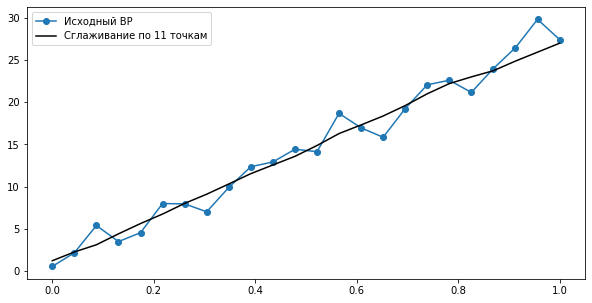

In [145]:
def smooth(x, window_len):
    if window_len<11:
        return x
    s=np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]
    w=np.ones(window_len, 'd')
    y=np.convolve(w/w.sum(), s, mode='same')
    return y[window_len:-window_len+1]

Smoothed_data_11 = smooth(Y, 11) # сглаживание по 11 точкам
plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')
plt.plot(t,Smoothed_data_11, 'k', label = 'Сглаживание по 11 точкам')
plt.legend()
plt.show()

## 22-23-24. Постройте собственную функцию сглаживания по трем точкам и по семи точкам на основе формул из лекции 4, сравните получившиеся результаты:

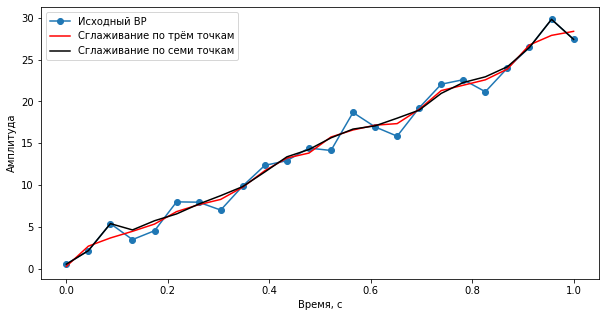

In [146]:
Y3 = np.zeros(len(Y))
Y3[0]=(5*Y[0] + 2*Y[1] - Y[2])/6    # находим крайние значения с помощью коэффициентов
Y3[23]=(5*Y[23] + 2*Y[22] - Y[21])/6

for i in range(1, len(Y)-1):
    Y3[i] = (Y[i-1] + Y[i] + Y[i + 1])/3

Y7 = np.zeros(len(Y))
Y7[0]=Y[0]
Y7[1]=Y[1]
Y7[2]=Y[2]
Y7[len(Y) - 3] = Y[len(Y) - 3]    # возьмем крайние значения из первоначального ВР
Y7[len(Y) - 2] = Y[len(Y) - 2]
Y7[len(Y) - 1] = Y[len(Y) - 1]

for i in range(3, len(Y) - 3):
    Y7[i] = (-2*Y[i - 3] + 3*Y[i - 2] + 6*Y[i - 1] + 7*Y[i] + 6*Y[i + 1] + 3*Y[i + 2] - 2*Y[i + 2])/21
    
plt.figure(figsize=(10,5))
plt.plot(t, Y,'o-', label = 'Исходный ВР')
plt.plot(t, Y3,'r', label = 'Сглаживание по трём точкам')
plt.plot(t, Y7,'k', label = 'Сглаживание по семи точкам')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.legend()
plt.show()

#### Таким образом, нетрудно заметить, что тренды получились одинаковыми (отличия допустимы только по краям временного интервала).

## 25. Постройте тренд методом экспоненциального сглаживания, самостоятельно подобрав его параметр (который лежит в диапазоне от 0 до 1):

### Экспоненциальное сглаживание по формуле из лекции 4:

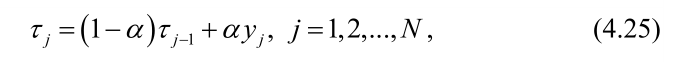

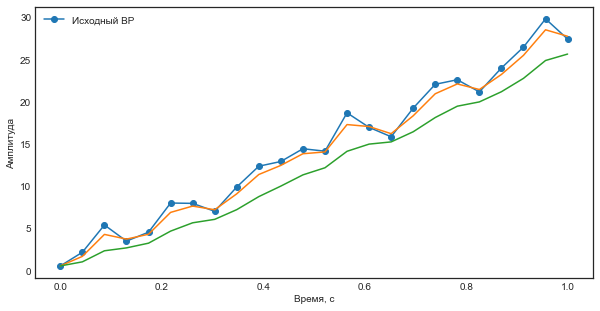

In [147]:
def exponential_smoothing(data, alpha):
    result = [data[0]]
    for n in range(1, len(data)):
        result.append((1 - alpha) * result[n-1] + alpha * data[n])
    return result

with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(10, 5))
    plt.plot(t, Y, 'o-', label = 'Исходный ВР')
    for alpha in [0.7, 0.3]:  # покажем два значения альфа
        plt.plot(t, exponential_smoothing(Y, alpha))
    plt.xlabel('Время, с')
    plt.ylabel('Амплитуда')
    plt.legend()
    plt.show()

#### Таким образом, модельное значение представляет собой средневзвешенную между текущим истинным и предыдущим модельным значениями. Вес альфа  называется сглаживающим фактором. Он определяет, как быстро мы будем "забывать" последнее доступное истинное наблюдение. Чем меньше альфа, тем больше влияния оказывают предыдущие модельные значения, и тем сильнее сглаживается ряд.

## Выводы по работе

В ходе выполнения данной лабораторной работы были изучены подходы к декомпозиции временных рядов на простейшие компоненты, одной из которых является тренд. Кроме того, рассмотрены такие способы построения кривых тренда, как регрессионные методы подгонки, методы скользящего сглаживания, и другие. По итогам работы дана обобщённая оценка полученным результатам с учётом возможностей популярных python-библиотек.